Chapter 24

# 回归，有截距
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码主要用于演示线性回归的过程，利用最小二乘法来拟合一条直线，以最小化实际观测值与模型预测值之间的平方误差。在这里，使用的是两个变量：鸡的数量（$x$）和兔的数量（$y$）。 

首先，定义了一个包含鸡和兔数量的数据集，并将其存储在NumPy数组中。接下来，构建一个线性模型 $y = ax + b$，其中$a$代表斜率，$b$代表截距。目标是找到最佳的$a$和$b$，使得平方误差最小。平方误差（SSE）被定义为：

$$
\text{SSE} = \sum_{i=1}^{n} (y_i - (ax_i + b))^2
$$

在代码中，首先构造一个关于$a$和$b$的平方误差函数，并利用SymPy库的符号运算来求解偏导数，得到最小化条件。通过求解一阶导数等于零的方程，得出最优解$(a^*, b^*)$。然后，计算最小的平方误差值，并将其与参数的值输出。

为了可视化，代码生成了两幅图。一幅展示了鸡和兔数量的散点图，另一幅则展示了平方误差的等高线图，并在图中标记出最优解的位置。最后，绘制了经过最佳拟合线的直线，并填充了表示预测区间的区域。

整个过程通过图形化的方式展示了如何通过数据拟合得到一个线性模型，并直观地表现了每个点到拟合线的距离，强调了线性回归在数据分析中的重要性。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库用于数组操作
import matplotlib.pyplot as plt  # 导入Matplotlib库用于绘图
from sympy.abc import a, b  # 从SymPy库中导入符号变量a和b
from sympy import *  # 导入SymPy库的所有功能

## 定义图形装饰函数

In [2]:
def fig_decor(ax):  # 定义图形装饰函数，用于设置图形样式
    plt.xlabel('$x$ (number of chickens)')  # 设置x轴标签为鸡的数量
    plt.ylabel('$y$ (number of rabbits)')  # 设置y轴标签为兔的数量
    plt.axis('scaled')  # 设置坐标轴比例相同
    ax.set_xlim([0, 120])  # 设置x轴范围为[0, 120]
    ax.set_ylim([0, 80])  # 设置y轴范围为[0, 80]
    plt.xticks(np.arange(0, 120 + 1, step=10))  # 设置x轴刻度，每10为一档
    plt.yticks(np.arange(0, 80 + 1, step=10))  # 设置y轴刻度，每10为一档
    plt.minorticks_on()  # 开启次级刻度
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color=[0.8, 0.8, 0.8])  # 设置次级网格线样式
    ax.spines['top'].set_visible(False)  # 隐藏上边框
    ax.spines['right'].set_visible(False)  # 隐藏右边框
    ax.spines['bottom'].set_visible(False)  # 隐藏下边框
    ax.spines['left'].set_visible(False)  # 隐藏左边框
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置主网格线样式

## 定义鸡和兔的数量数据

In [3]:
num_chickens = np.array([32, 110, 71, 79, 45, 20, 56, 55, 87, 68, 87, 63, 31, 88])  # 鸡的数量数据
num_rabbits = np.array([22, 53, 39, 40, 25, 15, 34, 34, 52, 41, 43, 33, 24, 52])  # 兔的数量数据

## 生成平方误差(SSE)的符号化表达式

In [4]:
y_pred = a * num_chickens + b  # 定义线性模型的预测值
f_ab_SSE = np.sum((num_rabbits - y_pred)**2)  # 计算平方误差(SSE)
f_ab_SSE = simplify(f_ab_SSE)  # 简化平方误差的符号表达式
print(f_ab_SSE)  # 打印简化后的平方误差表达式

65428*a**2 + 1784*a*b - 72228*a + 14*b**2 - 1014*b + 20179


## 绘制平方误差关于参数a和b的关系图

In [5]:
a_array = np.linspace(0, 0.9, 40)  # 创建参数a的取值范围
b_array = np.linspace(-20, 36, 40)  # 创建参数b的取值范围
aa, bb = np.meshgrid(a_array, b_array)  # 创建参数a和b的网格
f_ab_SSE_fcn = lambdify((a, b), f_ab_SSE)  # 将平方误差表达式转换为可执行函数
SSE_matrix = f_ab_SSE_fcn(aa, bb)  # 计算网格上每个点的平方误差

## 计算平方误差的一阶偏导数

In [6]:
df_da_SSE = diff(f_ab_SSE, a)  # 计算平方误差对a的偏导数
print(df_da_SSE)  # 打印平方误差对a的偏导数

130856*a + 1784*b - 72228


In [7]:
df_db_SSE = diff(f_ab_SSE, b)  # 计算平方误差对b的偏导数
print(df_db_SSE)  # 打印平方误差对b的偏导数

1784*a + 28*b - 1014


## 求解偏导数为零的解，确定参数a和b的最优值

In [8]:
sol = solve([df_da_SSE, df_db_SSE], [a, b])  # 求解偏导数方程，得到a和b的最优解
print(sol)  # 打印求解结果

{a: 513/1157, b: 18429/2314}


In [9]:
a_star = sol[a]  # 获取最优参数a
b_star = sol[b]  # 获取最优参数b
a_star = a_star.evalf()  # 计算a的数值解
b_star = b_star.evalf()  # 计算b的数值解
print(a_star)  # 打印最优参数a
print(b_star)  # 打印最优参数b

0.443388072601556
7.96413137424373


## 计算最小平方误差并输出

In [10]:
SSE_min = f_ab_SSE_fcn(a_star, b_star)  # 计算最小平方误差
print(SSE_min)  # 打印最小平方误差

128.668539325841


## 绘制平方误差的三维关系图

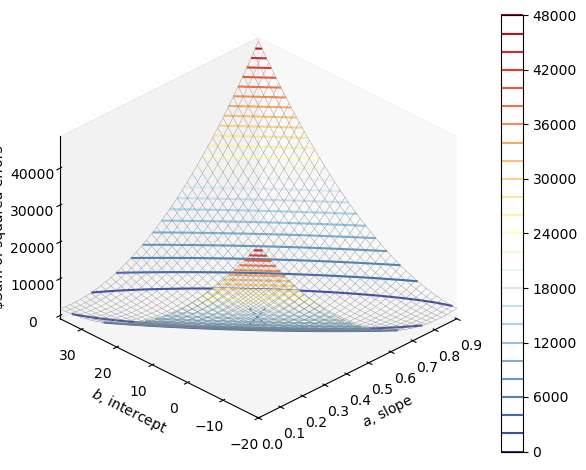

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建一个3D子图
ax.plot_wireframe(aa, bb, SSE_matrix, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制误差表面的网格线
plt.plot(a_star, b_star, SSE_min, marker='x', markersize=12)  # 绘制最优解点
colorbar = ax.contour(aa, bb, SSE_matrix, 30, cmap='RdYlBu_r')  # 绘制等高线
fig.colorbar(colorbar, ax=ax)  # 添加颜色条表示误差大小
ax.set_proj_type('ortho')  # 设置为正交投影
ax.set_xlabel('$a$, slope')  # 设置x轴标签
ax.set_ylabel('$b$, intercept')  # 设置y轴标签
ax.set_zlabel('$Sum of squared errors')  # 设置z轴标签
plt.tight_layout()  # 自动调整布局避免重叠
ax.set_xlim(aa.min(), aa.max())  # 设置x轴范围为网格范围
ax.set_ylim(bb.min(), bb.max())  # 设置y轴范围为网格范围
ax.view_init(azim=-135, elev=30)  # 设置视角角度
ax.grid(False)  # 关闭网格
plt.show()  # 显示图形

## 绘制平方误差的等高线填充图

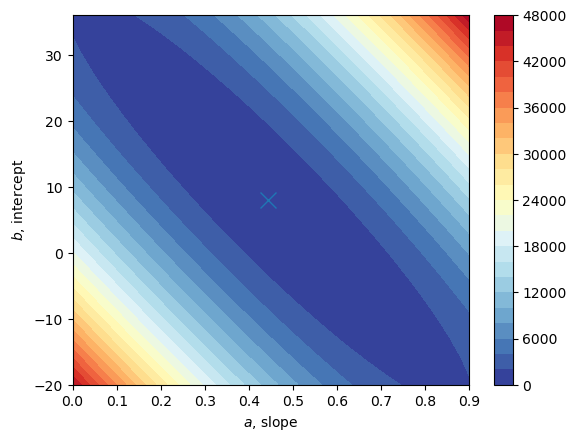

In [12]:
fig, ax = plt.subplots()  # 创建一个新的子图
colorbar = ax.contourf(aa, bb, SSE_matrix, 30, cmap='RdYlBu_r')  # 绘制填充等高线图
fig.colorbar(colorbar, ax=ax)  # 添加颜色条
plt.plot(a_star, b_star, marker='x', markersize=12)  # 绘制最优解点
ax.set_xlim(aa.min(), aa.max())  # 设置x轴范围为网格范围
ax.set_ylim(bb.min(), bb.max())  # 设置y轴范围为网格范围
ax.set_xlabel('$a$, slope')  # 设置x轴标签
ax.set_ylabel('$b$, intercept')  # 设置y轴标签
plt.show()  # 显示图形

In [13]:
## 绘制y = ax + b模型的拟合效果

In [14]:
def plot_square(x, y1, y2):  # 定义函数绘制预测值和真实值之间的误差矩形
    if y2 > y1:  # 如果y2大于y1，则交换两者以确保y1为较小值
        temp = y2
        y2 = y1
        y1 = temp
    d = y1 - y2  # 计算误差的高度
    plt.fill(np.vstack((x, x + d, x + d, x)),  # 矩形的x坐标
             np.vstack((y2, y2, y1, y1)),  # 矩形的y坐标
             facecolor='b', edgecolor='none', alpha=0.3)  # 设置矩形的颜色和透明度

In [15]:
x_array = np.linspace(0, 150, 10)[:, None]  # 生成x的值范围，用于绘制拟合线
y_pred = a_star * x_array + b_star  # 根据最优参数计算拟合的y值

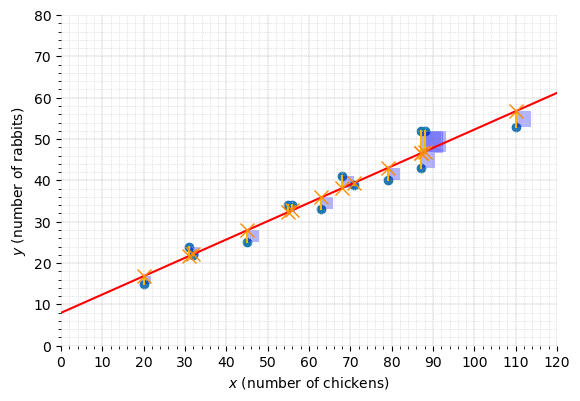

In [16]:
fig, ax = plt.subplots()  # 创建一个新的子图
plt.plot(x_array, y_pred, color='r')  # 绘制最佳拟合直线
plt.scatter(num_chickens, num_rabbits)  # 绘制鸡和兔子数据的散点图
num_rabbits_predicted = a_star * num_chickens + b_star  # 计算鸡数量对应的预测兔子数量
plt.plot(np.vstack((num_chickens, num_chickens)),  # 绘制从真实值到预测值的连线
         np.vstack((num_rabbits, num_rabbits_predicted)),
         color=np.array([255, 182, 0]) / 255)  # 设置连线的颜色
plt.plot(num_chickens, num_rabbits_predicted,  # 绘制预测值的散点
         linestyle='None', marker='x',
         markerfacecolor='darkorange', markeredgecolor='darkorange',
         markersize=10)

for i in range(0, len(num_rabbits_predicted)):  # 遍历每个数据点
    plot_square(num_chickens[i], num_rabbits[i], num_rabbits_predicted[i])  # 绘制误差矩形

fig_decor(ax)  # 应用图形装饰函数